## CNN - SVHN(Street View House Numbers) 데이터
* 약 73,000개의 학습 데이터와 약 26,000개의 시험 데이터
* 이미지는 각각 32 * 32 픽셀
* 분류는 총 10가지

0: 숫자 0, 1: 숫자 1, 2: 숫자 2, 3: 숫자 3, 4: 숫자 4, 5: 숫자 5, 6: 숫자 6, 7: 숫자 7, 8: 숫자 8, 9: 숫자 9

In [2]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow import keras
import tensorflow_datasets as tfds
import random
from keras.utils import to_categorical
import matplotlib.pyplot as plt

SEED = 123
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("재현을 위한 시드 고정:", SEED)

# SVHN 데이터셋 로드
(train_ds, test_ds), info = tfds.load(
    'svhn_cropped',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True,
    batch_size=-1
)

# 데이터를 numpy 배열로 변환
X_train, Y_train = tfds.as_numpy(train_ds)
X_test, Y_test = tfds.as_numpy(test_ds)

print("학습데이터 X와 Y의 차원:", X_train.shape, Y_train.shape)
print("시험데이터 X와 Y의 차원:", X_test.shape, Y_test.shape)

재현을 위한 시드 고정: 123


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.DRF0RG_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.DRF0RG_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.DRF0RG_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.
학습데이터 X와 Y의 차원: (73257, 32, 32, 3) (73257,)
시험데이터 X와 Y의 차원: (26032, 32, 32, 3) (26032,)


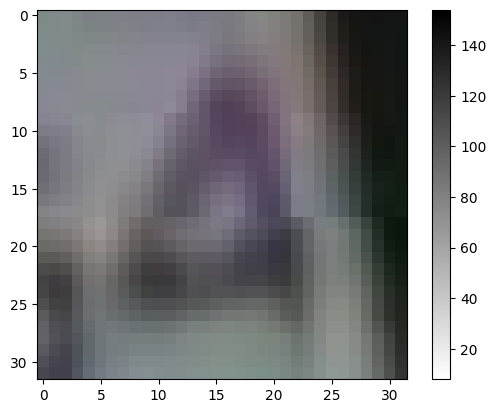

분류: 4


In [6]:
plt.figure()
plt.imshow(X_train[0,:,:,:], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
print("분류:", Y_train[0])

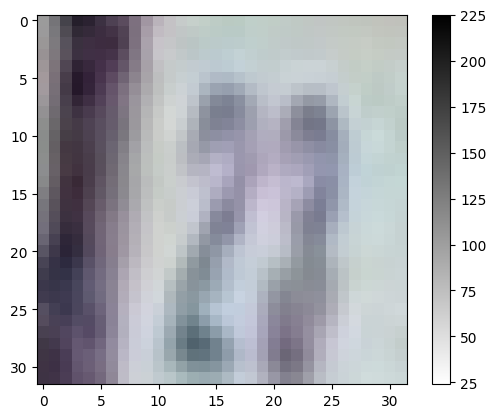

분류: 2


In [3]:
plt.figure()
plt.imshow(X_train[100,:,:], cmap=plt.cm.binary) # 101번째 이미지
plt.colorbar()
plt.grid(False)
plt.show()
print("분류:", Y_train[100])

In [11]:
Y_train = Y_train % 10
Y_test = Y_test % 10

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

print("변환 후 - 학습데이터 X와 Y의 차원:", X_train.shape, Y_train.shape)
print("변환 후 - 시험데이터 X와 Y의 차원:", X_test.shape, Y_test.shape)

# 정규화 (0-255 → 0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


변환 후 - 학습데이터 X와 Y의 차원: (73257, 32, 32, 3) (73257, 10)
변환 후 - 시험데이터 X와 Y의 차원: (26032, 32, 32, 3) (26032, 10)


* 합성곱 신경망 (CNN; Convolutional Neural Network) 적용


In [12]:
model = Sequential()
# 합성곱 레이어 1
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same', input_shape=[32,32,3]))
# 풀링 레이어 1
model.add(MaxPooling2D(pool_size=(2,2)))
# 합성곱 레이어 2, 필터(커널)사이즈 5*5, 필터개수 64개, 제로패딩
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))                                                                    # 풀링 레이어 2
model.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'))                        # 합성곱 레이어 3, 필터(커널)사이즈 5*5, 필터개수 128개, 제로패딩
model.add(MaxPooling2D(pool_size=(2,2)))                                                                    # 풀링 레이어 3
model.add(Flatten())                                                                                        # 플래튼
model.add(Dropout(rate=0.3))                                                                                # 드롭아웃
model.add(Dense(units=128, activation='relu'))                                                              # 완전연결 레이어 1, 뉴런 수 128개
model.add(Dropout(rate=0.3))                                                                                # 드롭아웃
model.add(Dense(units=64, activation='relu'))                                                               # 완전연결 레이어 2, 뉴런 수 64개
model.add(Dropout(rate=0.3))                                                                                # 드롭아웃
model.add(Dense(units=10, activation='softmax'))                                                            # 완전연결 레이어 3 (출력 레이어)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,802 (2.02 MB)

 Trainable params: 529,802 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

* 학습 조건 설정 및 학습하기
  * adam 최적화 방법 사용
  * 분류의 정확도(accuracy)를 같이 보여줌

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 325s 703ms/step - accuracy: 0.3241 - loss: 1.9081 - val_accuracy: 0.8331 - val_loss: 0.5552
Epoch 2/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 322s 704ms/step - accuracy: 0.8076 - loss: 0.6422 - val_accuracy: 0.8716 - val_loss: 0.4179
Epoch 3/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 318s 695ms/step - accuracy: 0.8604 - loss: 0.4757 - val_accuracy: 0.8939 - val_loss: 0.3639
Epoch 4/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 318s 694ms/step - accuracy: 0.8798 - loss: 0.4121 - val_accuracy: 0.8970 - val_loss: 0.3471
Epoch 5/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 319s 696ms/step - accuracy: 0.8907 - loss: 0.3732 - val_accuracy: 0.9062 - val_loss: 0.3190
Epoch 6/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 317s 693ms/step - accuracy: 0.9009 - loss: 0.3380 - val_accuracy: 0.9106 - val_loss: 0.2993
Epoch 7/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 318s 694ms/step - accuracy: 0.9095 - loss: 0.3129 - val_accuracy: 0.9130 - val_loss: 0.3036
Epoch 8/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 319s 695ms/step - accuracy: 0.9159 -

In [14]:
model.evaluate(X_test, Y_test)

814/814 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9133 - loss: 0.3491


[0.3509034812450409, 0.9137600064277649]

* 시험데이터를 이용한 모형평가
  * 학습데이터 평균교차엔트로피 0.1810, 정확도 94.59%
  * 검증데이터 평균교차엔트로피 0.3252, 정확도 91.93%
  * 시험데이터 평균교차엔트로피 0.3491, 정확도 91.33%

* 에폭별 비용함수(교차엔트로피)값의 변화

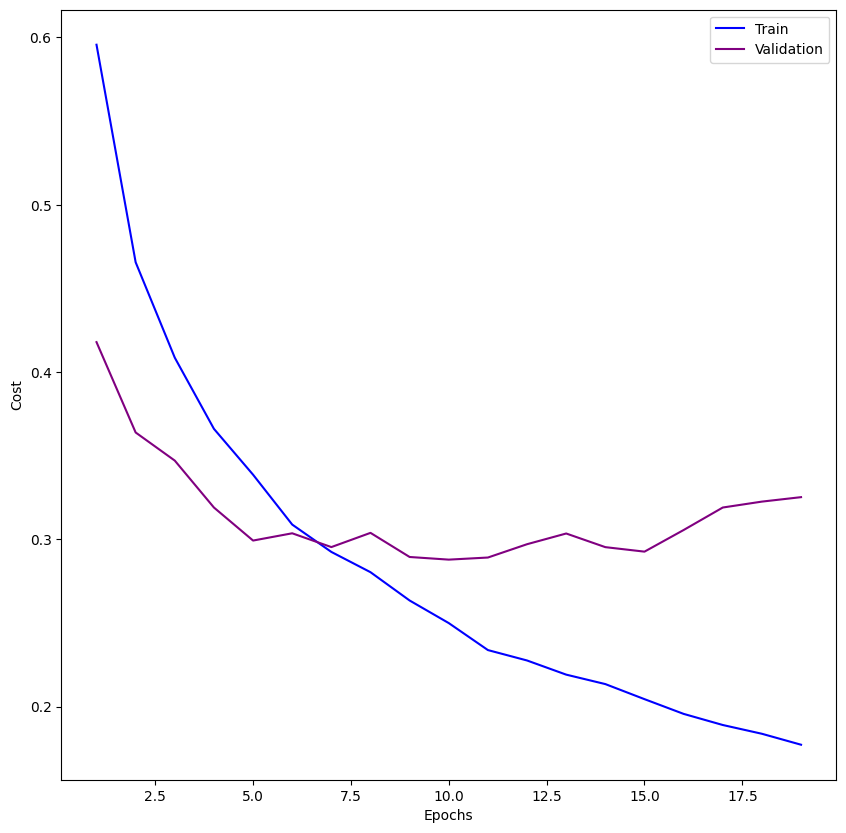

In [16]:
plt.figure(figsize=(10,10))
plt.plot(range(1,20), history.history['loss'][1:], label='Train', color='blue')
plt.plot(range(1,20), history.history['val_loss'][1:], label='Validation', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

1. 학습패턴
  * Train loss는 지속적으로 감소하며 매끄럽고 안정적인 하강 곡선을 형성
  * Validation loss는 초반 급격한 감소 이후 안정화
2. 과적합
  * 초반에는 두 loss가 거의 일치하는 패턴
  * 후반에는 약간 벌어지지만 심각하지 않음

* 분류 예측

In [18]:
y_test_pred = np.argmax(model.predict(X_test), axis=-1)
print("실제값:", np.argmax(Y_test[:10], axis=-1))
print("예측값", y_test_pred[:10])

814/814 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step
실제값: [2 7 2 4 4 2 6 2 3 1]
예측값 [2 7 2 4 4 2 6 2 3 1]


/tmp/ipython-input-3424582403.py:7: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3424582403.py:7: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3424582403.py:7: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3424582403.py:7: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-pack

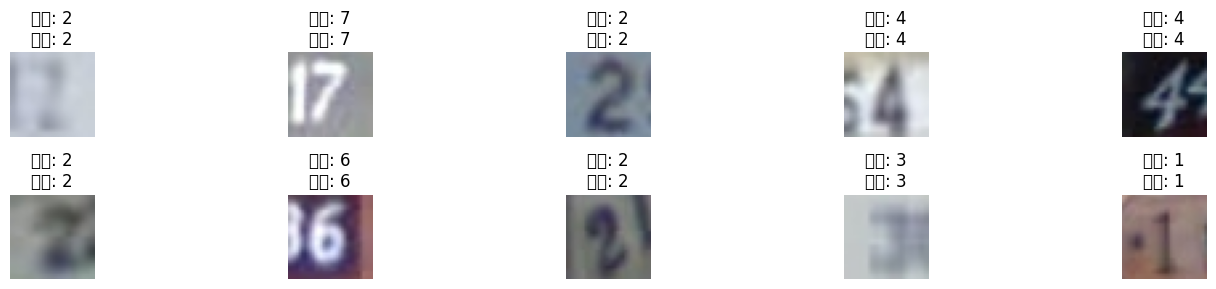

In [19]:
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f"예측: {y_test_pred[i]}\n실제: {np.argmax(Y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

* 10개 중 10개 모두 정답으로 모델이 매우 잘 학습되었음
* 특히 매우 선명한 이미지부터 어둡고 흐린 이미지까지 다양한 조건에서 잘 작동됨